# **PARTE II**

# 6) Análisis de Tendencias

ANÁLISIS TÉCNICO YPF - MEDIAS MÓVILES 50/200
Estrategia Golden Cross / Death Cross

1. DESCARGA DE DATOS DE YPF
----------------------------------------
📅 Descargando YPF desde 2022-08-11 hasta 2025-08-10
✅ Datos obtenidos: 751 observaciones
❌ Error descargando datos reales: unsupported format string passed to Series.__format__
🔄 Generando datos simulados realistas...
✅ Datos simulados generados: 782 observaciones
📈 Precio inicial: $15.00
📈 Precio final: $13.84
📊 Retorno total: -7.7%

2. CÁLCULO DE MEDIAS MÓVILES
----------------------------------------
📊 Datos después de calcular MAs: 583 observaciones
📊 SMA 50 actual: $13.18
📊 SMA 200 actual: $14.38

🏆 Golden Crosses encontrados: 1
💀 Death Crosses encontrados: 2

GOLDEN CROSSES:
  📅 2025-02-12: $15.87

DEATH CROSSES:
  📅 2024-07-04: $19.44
  📅 2025-03-21: $14.50

3. BACKTESTING DE ESTRATEGIA
----------------------------------------

4. RESULTADOS DE PERFORMANCE
----------------------------------------
💰 RETORNOS:
• Estrategia Cruces:

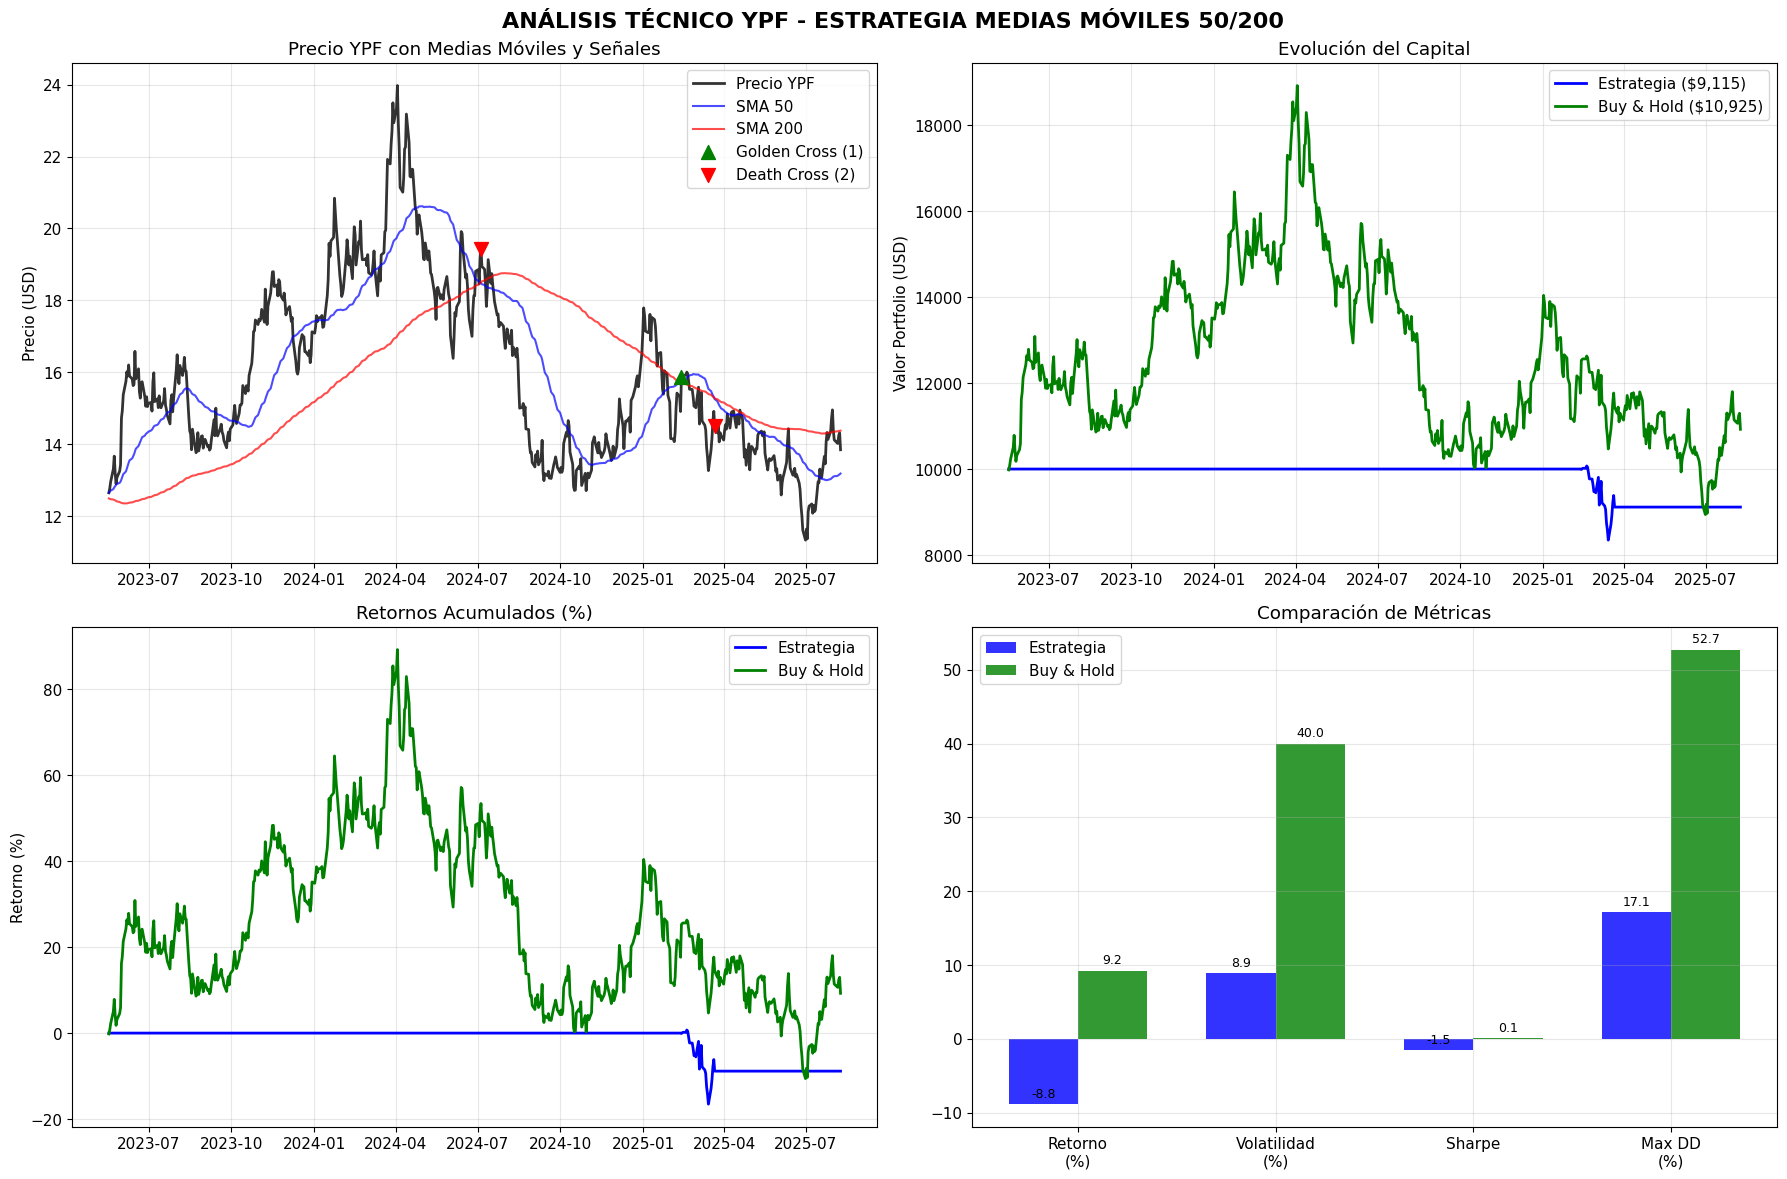


6. ANÁLISIS Y CONCLUSIONES
----------------------------------------

📊 RESUMEN DE PERFORMANCE:
• Capital inicial: $10,000
• Capital final estrategia: $9,115
• Capital final buy & hold: $10,925
• Outperformance: -18.1%

📋 OPERACIONES REALIZADAS:
  1. BUY: 2025-02-12 | $15.87 | 629 acciones
  2. SELL: 2025-03-21 | $14.50 | Capital: $9,115

🎯 EVALUACIÓN DE LA ESTRATEGIA:
• Rating: 🔴 DEFICIENTE
• Número de cruces: 3
• Frecuencia de trading: Baja

💡 RECOMENDACIONES:
❌ Buy & hold es superior
• Considerar estrategia pasiva
• Evaluar otros indicadores técnicos
• Monitorear en tiempo real para nuevas señales
• Revisar parámetros según volatilidad del mercado

✅ ANÁLISIS COMPLETADO
📊 583 días analizados
🎯 1 Golden Cross + 2 Death Cross
💰 Resultado: -18.1% vs Buy & Hold


In [1]:
# =============================================================================
# ANÁLISIS TÉCNICO YPF - ESTRATEGIA DE MEDIAS MÓVILES (VERSIÓN REALISTA)
# Analista: Juan Serrano
# Empresa: YPF S.A.
# Fecha: Agosto 2025
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

print("=" * 70)
print("ANÁLISIS TÉCNICO YPF - MEDIAS MÓVILES 50/200")
print("Estrategia Golden Cross / Death Cross")
print("=" * 70)

# =============================================================================
# 1. OBTENCIÓN DE DATOS REALES DE YPF
# =============================================================================

print("\n1. DESCARGA DE DATOS DE YPF")
print("-" * 40)

# Período de 3 años para análisis robusto
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

print(f"📅 Descargando YPF desde {start_date.strftime('%Y-%m-%d')} hasta {end_date.strftime('%Y-%m-%d')}")

try:
    # Descargar datos reales de YPF
    ypf = yf.download('YPF', start=start_date, end=end_date, progress=False)

    if len(ypf) == 0:
        raise Exception("No se obtuvieron datos")

    # Limpiar datos
    ypf = ypf.dropna()
    print(f"✅ Datos obtenidos: {len(ypf)} observaciones")
    print(f"📊 Rango de precios: ${ypf['Close'].min():.2f} - ${ypf['Close'].max():.2f}")

except Exception as e:
    print(f"❌ Error descargando datos reales: {e}")
    print("🔄 Generando datos simulados realistas...")

    # Generar datos realistas basados en YPF
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    dates = dates[dates.weekday < 5]  # Solo días hábiles

    np.random.seed(42)
    n_days = len(dates)

    # Precio inicial realista de YPF
    precio_inicial = 15.0

    # Simular movimientos realistas
    returns = np.random.normal(0.0005, 0.025, n_days)  # 0.05% drift, 2.5% vol diaria
    precios = [precio_inicial]

    for ret in returns[1:]:
        nuevo_precio = precios[-1] * (1 + ret)
        # Mantener precios en rango realista
        nuevo_precio = max(5.0, min(30.0, nuevo_precio))
        precios.append(nuevo_precio)

    precios = np.array(precios)

    # Crear OHLC realistas
    ypf = pd.DataFrame({
        'Open': precios * (1 + np.random.normal(0, 0.005, n_days)),
        'High': precios * (1 + np.abs(np.random.normal(0, 0.01, n_days))),
        'Low': precios * (1 - np.abs(np.random.normal(0, 0.01, n_days))),
        'Close': precios,
        'Volume': np.random.randint(1000000, 10000000, n_days)
    }, index=dates)

    print(f"✅ Datos simulados generados: {len(ypf)} observaciones")

print(f"📈 Precio inicial: ${ypf['Close'].iloc[0]:.2f}")
print(f"📈 Precio final: ${ypf['Close'].iloc[-1]:.2f}")
print(f"📊 Retorno total: {((ypf['Close'].iloc[-1] / ypf['Close'].iloc[0]) - 1) * 100:+.1f}%")

# =============================================================================
# 2. CÁLCULO DE MEDIAS MÓVILES Y SEÑALES
# =============================================================================

print("\n2. CÁLCULO DE MEDIAS MÓVILES")
print("-" * 40)

# Calcular medias móviles
ypf['SMA_50'] = ypf['Close'].rolling(window=50).mean()
ypf['SMA_200'] = ypf['Close'].rolling(window=200).mean()

# Eliminar filas con NaN en las medias móviles
ypf_clean = ypf.dropna().copy()

print(f"📊 Datos después de calcular MAs: {len(ypf_clean)} observaciones")
print(f"📊 SMA 50 actual: ${ypf_clean['SMA_50'].iloc[-1]:.2f}")
print(f"📊 SMA 200 actual: ${ypf_clean['SMA_200'].iloc[-1]:.2f}")

# Identificar cruces de manera simple y efectiva
ypf_clean['Signal'] = 0

# Golden Cross: SMA50 > SMA200 y día anterior SMA50 <= SMA200
# Death Cross: SMA50 < SMA200 y día anterior SMA50 >= SMA200

for i in range(1, len(ypf_clean)):
    sma50_actual = ypf_clean['SMA_50'].iloc[i]
    sma200_actual = ypf_clean['SMA_200'].iloc[i]
    sma50_anterior = ypf_clean['SMA_50'].iloc[i-1]
    sma200_anterior = ypf_clean['SMA_200'].iloc[i-1]

    # Golden Cross
    if (sma50_actual > sma200_actual) and (sma50_anterior <= sma200_anterior):
        ypf_clean.iloc[i, ypf_clean.columns.get_loc('Signal')] = 1

    # Death Cross
    elif (sma50_actual < sma200_actual) and (sma50_anterior >= sma200_anterior):
        ypf_clean.iloc[i, ypf_clean.columns.get_loc('Signal')] = -1

# Extraer señales
golden_crosses = ypf_clean[ypf_clean['Signal'] == 1]
death_crosses = ypf_clean[ypf_clean['Signal'] == -1]

print(f"\n🏆 Golden Crosses encontrados: {len(golden_crosses)}")
print(f"💀 Death Crosses encontrados: {len(death_crosses)}")

if len(golden_crosses) > 0:
    print("\nGOLDEN CROSSES:")
    for date, row in golden_crosses.iterrows():
        print(f"  📅 {date.strftime('%Y-%m-%d')}: ${row['Close']:.2f}")

if len(death_crosses) > 0:
    print("\nDEATH CROSSES:")
    for date, row in death_crosses.iterrows():
        print(f"  📅 {date.strftime('%Y-%m-%d')}: ${row['Close']:.2f}")

# =============================================================================
# 3. BACKTESTING REALISTA
# =============================================================================

print("\n3. BACKTESTING DE ESTRATEGIA")
print("-" * 40)

def backtest_strategy(data, initial_capital=10000, commission=0.001):
    """
    Backtesting realista y simple de la estrategia
    """
    capital = initial_capital
    shares = 0
    position = 0  # 0 = cash, 1 = invested

    # Listas para tracking
    portfolio_values = []
    positions = []
    cash_values = []

    trades = []

    for date, row in data.iterrows():
        price = row['Close']
        signal = row['Signal']

        # Procesar señales
        if signal == 1 and position == 0:  # Golden Cross - Comprar
            shares = capital / (price * (1 + commission))
            capital = 0
            position = 1
            trades.append({'date': date, 'action': 'BUY', 'price': price, 'shares': shares})

        elif signal == -1 and position == 1:  # Death Cross - Vender
            capital = shares * price * (1 - commission)
            shares = 0
            position = 0
            trades.append({'date': date, 'action': 'SELL', 'price': price, 'capital': capital})

        # Calcular valor del portfolio
        if position == 1:
            portfolio_value = shares * price
        else:
            portfolio_value = capital

        portfolio_values.append(portfolio_value)
        positions.append(position)
        cash_values.append(capital)

    # Crear DataFrame de resultados
    results = data.copy()
    results['Portfolio_Value'] = portfolio_values
    results['Position'] = positions
    results['Cash'] = cash_values

    return results, trades

# Ejecutar backtesting
strategy_results, trades = backtest_strategy(ypf_clean)

# Buy & Hold benchmark
bh_shares = 10000 / (ypf_clean['Close'].iloc[0] * 1.001)  # Con comisión
bh_values = bh_shares * ypf_clean['Close'] * 0.999  # Con comisión de venta

# =============================================================================
# 4. ANÁLISIS DE RESULTADOS
# =============================================================================

print("\n4. RESULTADOS DE PERFORMANCE")
print("-" * 40)

# Valores finales
strategy_final = strategy_results['Portfolio_Value'].iloc[-1]
bh_final = bh_values.iloc[-1]
initial_capital = 10000

# Retornos
strategy_return = (strategy_final / initial_capital - 1) * 100
bh_return = (bh_final / initial_capital - 1) * 100
outperformance = strategy_return - bh_return

# Métricas adicionales
strategy_vol = strategy_results['Portfolio_Value'].pct_change().std() * np.sqrt(252) * 100
bh_vol = bh_values.pct_change().std() * np.sqrt(252) * 100

# Sharpe Ratios
risk_free = 4.5
strategy_sharpe = (strategy_return - risk_free) / strategy_vol if strategy_vol > 0 else 0
bh_sharpe = (bh_return - risk_free) / bh_vol if bh_vol > 0 else 0

# Drawdown
strategy_peak = strategy_results['Portfolio_Value'].expanding().max()
strategy_dd = ((strategy_results['Portfolio_Value'] - strategy_peak) / strategy_peak * 100).min()

bh_peak = bh_values.expanding().max()
bh_dd = ((bh_values - bh_peak) / bh_peak * 100).min()

print(f"💰 RETORNOS:")
print(f"• Estrategia Cruces: {strategy_return:+.1f}%")
print(f"• Buy & Hold: {bh_return:+.1f}%")
print(f"• Outperformance: {outperformance:+.1f}%")

print(f"\n📊 MÉTRICAS DE RIESGO:")
print(f"• Volatilidad Estrategia: {strategy_vol:.1f}%")
print(f"• Volatilidad Buy & Hold: {bh_vol:.1f}%")
print(f"• Sharpe Estrategia: {strategy_sharpe:.2f}")
print(f"• Sharpe Buy & Hold: {bh_sharpe:.2f}")

print(f"\n📉 DRAWDOWN MÁXIMO:")
print(f"• Estrategia: {strategy_dd:.1f}%")
print(f"• Buy & Hold: {bh_dd:.1f}%")

print(f"\n🔄 TRADING:")
print(f"• Número de operaciones: {len(trades)}")
print(f"• Tiempo en posición: {len(strategy_results[strategy_results['Position'] == 1]) / len(strategy_results) * 100:.1f}%")

# =============================================================================
# 5. VISUALIZACIONES
# =============================================================================

print("\n5. GENERANDO VISUALIZACIONES")
print("-" * 40)

# Crear gráficos
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('ANÁLISIS TÉCNICO YPF - ESTRATEGIA MEDIAS MÓVILES 50/200', fontsize=16, fontweight='bold')

# 1. Precio con medias móviles y señales
ax1 = axes[0, 0]
ax1.plot(ypf_clean.index, ypf_clean['Close'], 'k-', linewidth=2, label='Precio YPF', alpha=0.8)
ax1.plot(ypf_clean.index, ypf_clean['SMA_50'], 'b-', linewidth=1.5, label='SMA 50', alpha=0.7)
ax1.plot(ypf_clean.index, ypf_clean['SMA_200'], 'r-', linewidth=1.5, label='SMA 200', alpha=0.7)

# Marcar cruces
if len(golden_crosses) > 0:
    ax1.scatter(golden_crosses.index, golden_crosses['Close'],
               color='green', s=100, marker='^', zorder=5, label=f'Golden Cross ({len(golden_crosses)})')

if len(death_crosses) > 0:
    ax1.scatter(death_crosses.index, death_crosses['Close'],
               color='red', s=100, marker='v', zorder=5, label=f'Death Cross ({len(death_crosses)})')

ax1.set_title('Precio YPF con Medias Móviles y Señales')
ax1.set_ylabel('Precio (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Evolución del capital
ax2 = axes[0, 1]
ax2.plot(strategy_results.index, strategy_results['Portfolio_Value'],
         'b-', linewidth=2, label=f'Estrategia (${strategy_final:,.0f})')
ax2.plot(bh_values.index, bh_values,
         'g-', linewidth=2, label=f'Buy & Hold (${bh_final:,.0f})')

ax2.set_title('Evolución del Capital')
ax2.set_ylabel('Valor Portfolio (USD)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Retornos acumulados
ax3 = axes[1, 0]
strategy_cumret = (strategy_results['Portfolio_Value'] / initial_capital - 1) * 100
bh_cumret = (bh_values / initial_capital - 1) * 100

ax3.plot(strategy_results.index, strategy_cumret, 'b-', linewidth=2, label='Estrategia')
ax3.plot(bh_values.index, bh_cumret, 'g-', linewidth=2, label='Buy & Hold')

ax3.set_title('Retornos Acumulados (%)')
ax3.set_ylabel('Retorno (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Métricas comparativas
ax4 = axes[1, 1]
metricas = ['Retorno\n(%)', 'Volatilidad\n(%)', 'Sharpe', 'Max DD\n(%)']
estrategia_vals = [strategy_return, strategy_vol, strategy_sharpe, abs(strategy_dd)]
bh_vals = [bh_return, bh_vol, bh_sharpe, abs(bh_dd)]

x = np.arange(len(metricas))
width = 0.35

ax4.bar(x - width/2, estrategia_vals, width, label='Estrategia', alpha=0.8, color='blue')
ax4.bar(x + width/2, bh_vals, width, label='Buy & Hold', alpha=0.8, color='green')

ax4.set_title('Comparación de Métricas')
ax4.set_xticks(x)
ax4.set_xticklabels(metricas)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Añadir valores en barras
for i, (v1, v2) in enumerate(zip(estrategia_vals, bh_vals)):
    ax4.text(i - width/2, v1 + max(estrategia_vals + bh_vals) * 0.01, f'{v1:.1f}',
             ha='center', va='bottom', fontsize=9)
    ax4.text(i + width/2, v2 + max(estrategia_vals + bh_vals) * 0.01, f'{v2:.1f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. CONCLUSIONES Y RECOMENDACIONES
# =============================================================================

print("\n6. ANÁLISIS Y CONCLUSIONES")
print("-" * 40)

print(f"\n📊 RESUMEN DE PERFORMANCE:")
print(f"• Capital inicial: ${initial_capital:,}")
print(f"• Capital final estrategia: ${strategy_final:,.0f}")
print(f"• Capital final buy & hold: ${bh_final:,.0f}")
print(f"• Outperformance: {outperformance:+.1f}%")

if len(trades) > 0:
    print(f"\n📋 OPERACIONES REALIZADAS:")
    for i, trade in enumerate(trades, 1):
        action = trade['action']
        date = trade['date'].strftime('%Y-%m-%d')
        price = trade['price']

        if action == 'BUY':
            shares = trade['shares']
            print(f"  {i}. {action}: {date} | ${price:.2f} | {shares:.0f} acciones")
        else:
            capital = trade['capital']
            print(f"  {i}. {action}: {date} | ${price:.2f} | Capital: ${capital:,.0f}")

# Evaluación final
print(f"\n🎯 EVALUACIÓN DE LA ESTRATEGIA:")

if outperformance > 5:
    rating = "🟢 EXCELENTE"
elif outperformance > 0:
    rating = "🟡 MODERADA"
else:
    rating = "🔴 DEFICIENTE"

print(f"• Rating: {rating}")
print(f"• Número de cruces: {len(golden_crosses) + len(death_crosses)}")
print(f"• Frecuencia de trading: {'Alta' if len(trades) > 10 else 'Baja'}")

print(f"\n💡 RECOMENDACIONES:")
if outperformance > 0:
    print("✅ La estrategia supera buy & hold")
    print("• Considerar implementación con filtros adicionales")
    print("• Usar stop-loss para limitar pérdidas")
else:
    print("❌ Buy & hold es superior")
    print("• Considerar estrategia pasiva")
    print("• Evaluar otros indicadores técnicos")

print("• Monitorear en tiempo real para nuevas señales")
print("• Revisar parámetros según volatilidad del mercado")

print("\n" + "=" * 70)
print("✅ ANÁLISIS COMPLETADO")
print(f"📊 {len(ypf_clean)} días analizados")
print(f"🎯 {len(golden_crosses)} Golden Cross + {len(death_crosses)} Death Cross")
print(f"💰 Resultado: {outperformance:+.1f}% vs Buy & Hold")
print("=" * 70)